## Linear graphs
На найвищому рівні Matplotlib знаходиться модуль matplotlib.pyplot, який виконує побудову графіків.\
Основним елементом зображення є фігура (Figure), на неї накладається одне або більше полів з графіками, осі координат, текстові написи тощо. Для побудови графіка використовується функція plot.\

Якщо в якості параметра функції plot передати список, то значення з цього списку будуть відкладені по осі ординат (вісь y), а по осі абсцис (вісь x) будуть відкладені індекси елементів масиву. Якщо ми хочемо задати значення відразу по двох осях (x, y), необхідно в plot передати два списки.

Наприклад, побудуємо графік денної погоди в Полтаві за перші 8 днів вересня 2021 року.

In [ ]:
import pandas as pd
from matplotlib.pyplot import plt

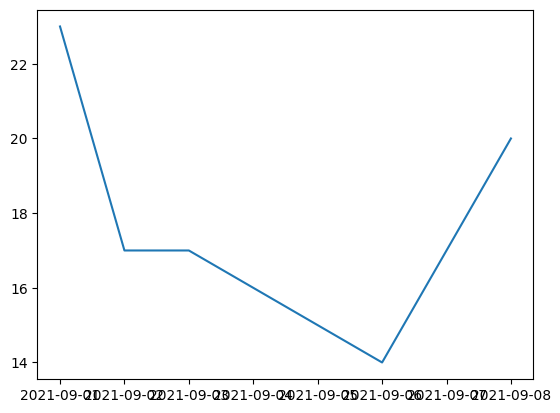

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

date = pd.date_range(start='2021-09-01', freq='D', periods=8)
plt.plot(date, [23, 17, 17, 16, 15, 14, 17, 20])
plt.show()

### Текст на графіках

​Найчастіше на графіку нам потрібно додати назви осей та графіка, можливо текстові примітки і, якщо графіків кілька, обов'язково легенду.\
Для цього використовується функція xlabel для осі x та ylabel для y осі.\
Функції приймають наступні параметри:\
- *xlabel (або ylabel)* — рядок тексту підпису\
А також параметри конструктора класу matplotlib.text.Text :
- *fontsize* або *size* — розмір шрифту, число або значення зі списку xx-small, x-small, small, medium, large, x-large, xx-large
- *fontstyle* — стиль шрифту значення зі списку normal, italic, oblique
- *fontweight* — товщина шрифту може визначатися або числом в діапазоні від 0 до 1000, або значенням зі списку ultralight, light, normal, regular, book, medium, roman, semibold, demibold, demi, bold, heavy, extra bold, black
- *color* — значення кольору для тексту підпису. Можливості вибору кольору занадто великі і подивитися варіанти можна за цим посиланням (https://matplotlib.org/stable/gallery/color/named_colors.html), де вони теж наведені не повністю.

In [ ]:
plt.xlabel("Дата", fontsize="small", color="midnightblue")
plt.ylabel("Температура", fontsize="small", color="midnightblue")

Назву графіка можна задати методом title

In [ ]:
plt.title("Денна погода у м. Полтава", fontsize=15)

За допомогою параметра loc можна задати вирівнювання заголовка center, left, right\
Також, як і для методів xlabel та ylabel, доступні параметри конструктора класу Text.

Щоб помістити текст на полі графіка, необхідно викликати метод text.\
Перший та другий її аргументи — це координати позиції, третій — текст напису, приклад використання:

In [ ]:
date = pd.date_range(start='2021-09-01', freq='D', periods=8)
plt.plot(date, [23, 17, 17, 16, 15, 14, 17, 20])
plt.text(date[0], 15, "Осінь досить тепла", color="blue")
plt.show()

І додати легенду можна, викликавши метод legend, не забувши додати параметр label у метод plot. І остаточний результат буде наступним.

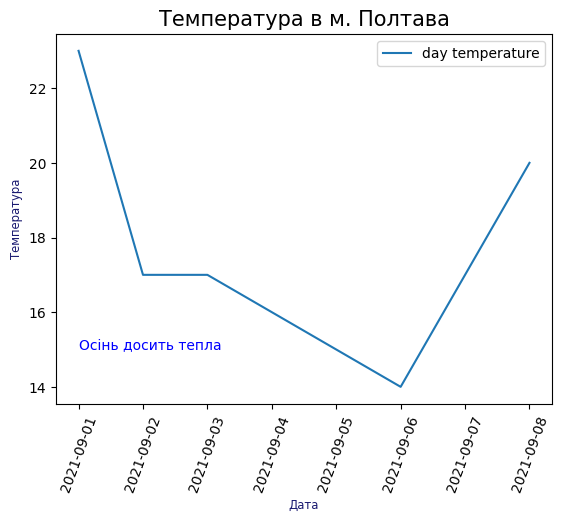

In [12]:
date = pd.date_range(start='2021-09-01', freq='D', periods=8)
plt.plot(date, [23, 17, 17, 16, 15, 14, 17, 20], label='day temperature')
plt.xlabel('Дата', fontsize='small', color='midnightblue')
plt.ylabel('Температура', fontsize='small', color='midnightblue')
plt.title('Температура в м. Полтава', fontsize=15)
plt.text(date[0], 15, 'Осінь досить тепла', color="blue")
plt.legend()
plt.xticks(rotation=70)
plt.show()

### Компонування графіків

Якщо ми хочемо розмістити два графіки, хорошим способом буде використовувати метод subplots.

*subplots* повертає два об'єкти, перший - це Figure, підкладка, на якій будуть розміщені поля з графіками, другий - об'єкт (або масив об'єктів) Axes, через який можна отримати повний доступ до налаштування зовнішнього вигляду елементів, що відображаються.

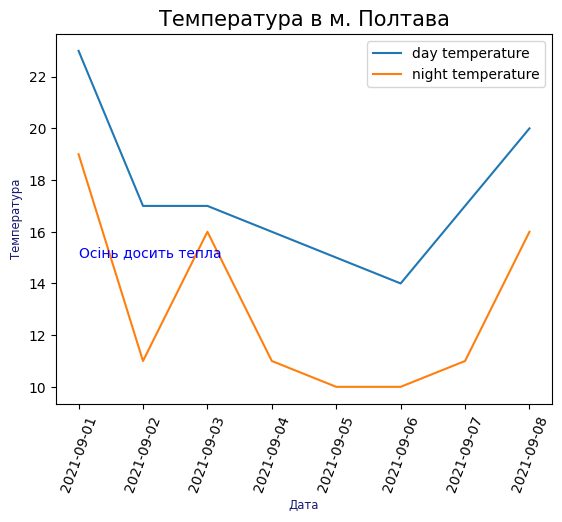

In [14]:
date = pd.date_range(start='2021-09-01', freq='D', periods=8)
fig, axs = plt.subplots()
axs.plot(date, [23, 17, 17, 16, 15, 14, 17, 20], label='day temperature')
axs.plot(date, [19, 11, 16, 11, 10, 10, 11, 16], label='night temperature')
plt.xlabel('Дата', fontsize='small', color='midnightblue')
plt.ylabel('Температура', fontsize='small', color='midnightblue')
plt.title('Температура в м. Полтава', fontsize=15)
plt.text(date[0], 15, 'Осінь досить тепла', color="blue")
plt.xticks(rotation=70)
plt.legend()
plt.show()

Якщо ми хочемо розділити графіки на частини, то у функцію subplots ми повинні передати кількість рядків та стовпців. Більше про метод можна прочитати тут.

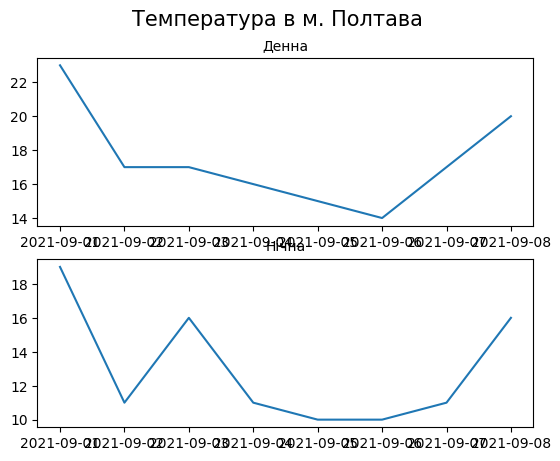

In [29]:
date = pd.date_range(start='2021-09-01', freq='D', periods=8)
fig, axs = plt.subplots(2, 1)

axs[0].plot(date, [23, 17, 17, 16, 15, 14, 17, 20], label='day temperature')
axs[1].plot(date, [19, 11, 16, 11, 10, 10, 11, 16], label='night temperature')

axs[0].set_title('Денна', fontsize=10)
axs[1].set_title('Нічна', fontsize=10)

fig.suptitle('Температура в м. Полтава', fontsize=15)

plt.show()

### Налаштування графіків​

Стиль лінії графіка задається через параметр linestyle, який може приймати значення з таблиці

Колір лінії графіка задається через параметр color (c — скорочений варіант).\
Варіантів встановлення формату багато.\
Так можна використовувати формат RGB або RGBA — кортеж значень з плаваючою крапкою в діапазоні [0, 1] (0.5, 0.6, 0.1) або значення в hex форматі #0a0a0a.\
Також колір можна задати за допомогою набору символів b, g, r, c, m, y, k, w

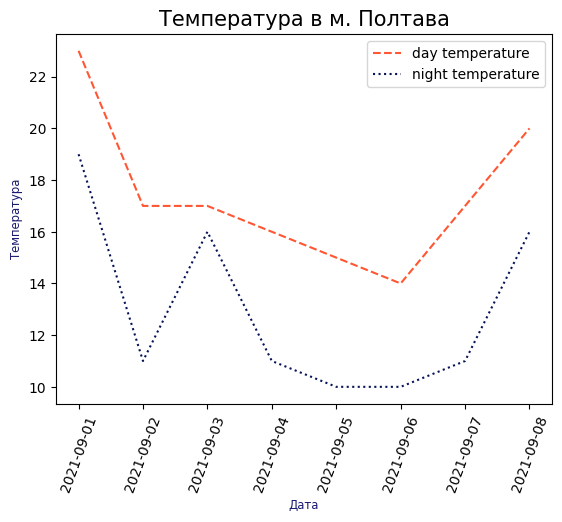

In [34]:
date = pd.date_range(start="2021-09-01", freq="D", periods=8)
plt.plot(
    date,
    [23, 17, 17, 16, 15, 14, 17, 20],
    label="day temperature",
    linestyle="--",
    color="#FF5733",
)
plt.plot(
    date,
    [19, 11, 16, 11, 10, 10, 11, 16],
    label="night temperature",
    linestyle=":",
    color="#061358",
)
plt.xlabel("Дата", fontsize="small", color="midnightblue")
plt.ylabel("Температура", fontsize="small", color="midnightblue")
plt.title("Температура в м. Полтава", fontsize=15)
plt.xticks(rotation=70)
plt.legend()
plt.show()

Щоб встановити для межі осі інше значення, використовуються методи *xlim та ylim*.

Також можна відобразити сітку за допомогою методу *grid*

Товщина лінії визначається значенням аргументу *lineweight (або просто lw)* в пунктах (pt).

Щоб під час виклику методу plot включити маркери — це символи, що виводяться в кожній точці даних графіка, потрібно визначити аргумент *marker*.

І остаточно гарно оформлений графік буде виглядати так:

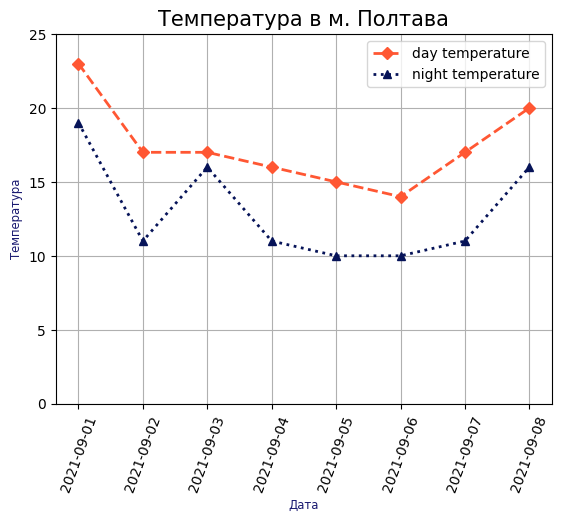

In [36]:
date = pd.date_range(start="2021-09-01", freq="D", periods=8)
plt.plot(
    date,
    [23, 17, 17, 16, 15, 14, 17, 20],
    label="day temperature",
    linestyle="--",
    color="#FF5733",
    linewidth=2,
    marker="D",
)
plt.plot(
    date,
    [19, 11, 16, 11, 10, 10, 11, 16],
    label="night temperature",
    linestyle=":",
    color="#061358",
    linewidth=2,
    marker="^",
)
plt.ylim(0, 25)
plt.xlabel("Дата", fontsize="small", color="midnightblue")
plt.ylabel("Температура", fontsize="small", color="midnightblue")
plt.title("Температура в м. Полтава", fontsize=15)
plt.xticks(rotation=70)
plt.legend()
plt.grid()
plt.show()